## Measuring bias with Optimal Transport by calculating the Wasserstein distance

"Computational Optimal Transport" https://arxiv.org/abs/1803.00567

"POT: Python Optimal Transport" https://jmlr.org/papers/v22/20-451.html

### Introduction

Optimal Transport (OT) is a field of mathematics which studies the geometry of probability spaces. Among its many contributions, OT provides a principled way to compare and align probability distributions by taking into account the underlying geometry of the
considered metric space.

Optimal Transport (OT) is a mathematical problem that was first introduced by Gaspard Monge in 1781. It addresses the task of determining the most efficient method for transporting mass from one distribution to another. In this problem, the cost associated with moving a unit of mass from one position to another is referred to as the ground cost. The primary objective of OT is to minimize the total cost incurred when moving one mass distribution onto another. The optimization problem can be expressed for two distributions $\mu_s$ and $\mu_t$ as
$$
\min_{\sigma \in \text{Perm}(n)} \frac{1}{n} \sum_{i=1}^n \textbf{C}_{i,\sigma(i)}
$$

where $\textbf{C}_{\cdot, \cdot}$ is the ground cost and the constraint $m_{\#} \mu_s=\mu_t$ ensures that $\mu_s$ is completely transported to $\mu_t$. Where $T_{\#} \mu_s = \mu_s(T^{-1}(B)) = u_{t}(B)$ with $T$ as a trasportation matrix between $\mu_s$ and $\mu_t$ at point $B$. 

### Example

Suppose we have two distributions $a$ and $b$ (as shown in the picture below), and we need to calculate the Wasserstein distance between these two distributions.

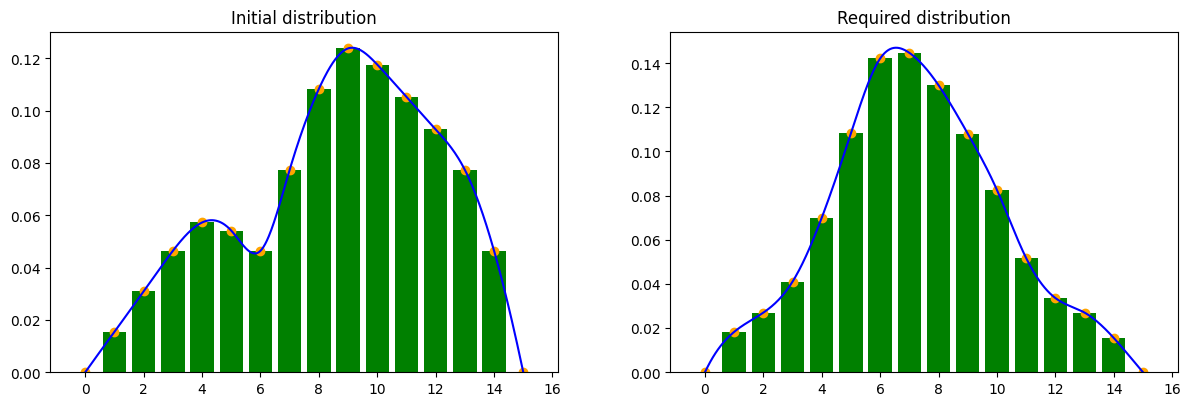

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Initial distribution
a = np.array([0.,         0.01547988, 0.03095975, 0.04643963, 
              0.05727554, 0.05417957, 0.04643963, 0.07739938, 
              0.10835913, 0.12383901, 0.11764706, 0.10526316,
              0.09287926, 0.07739938, 0.04643962, 0.        ])
# Required distribution
b = np.array([0.,         0.01829787, 0.02702128, 0.04106383, 
              0.07,       0.10829787, 0.14212766, 0.14468085, 
              0.13,       0.10808511, 0.08255319, 0.05170213, 
              0.03361702, 0.02702128, 0.01553191, 0.        ])

# Drawing both of them
figure, axis = plt.subplots(1, 2)
figure.set_figheight(4)
figure.set_figwidth(12)
figure.tight_layout(w_pad = 5)

def draw(y, id):
    x = np.array(range(0, np.size(y)))
    XYSpline = make_interp_spline(x, y) 
    X = np.linspace(x.min(), x.max(), 500)
    Y = XYSpline(X)
    axis[id].bar(x, y, color="green")
    axis[id].scatter(x, y, color="orange")
    axis[id].plot(X, Y, color='blue')

axis[0].title.set_text("Initial distribution")
axis[1].title.set_text("Required distribution")
draw(a, 0)
draw(b, 1)

plt.show()

In order to better understand how Optimal Transport works, below is presented the code considering the case when the matrix cost distance is presented and defined as the difference between positions of each part of the distribution. That is $\text{distance}[i][j] = abs(i - j)$.

In [2]:
from aif360.detectors.ot_detector import ot_bias_scan
import pandas as pd

_a = pd.Series(a)
_b = pd.Series(b)
distance = np.zeros((np.size(a), np.size(b)))
for i in range(np.size(a)):
    for j in range(np.size(b)):
        distance[i][j] = abs(i - j)
c0 = ot_bias_scan(_a, _b, distance)

print("So our Wasserstein distance with basic definition is equal to ", c0, ".", sep="")

So our Wasserstein distance with basic definition is equal to 1.3773703499999999.


But as we are interested in measuring bias with OT, our definition of the distance is calculated as $\text{distance}[i][j] = abs(\text{golden\_standard}[i] - \text{classifier}[j]).$

In [3]:
_a = pd.Series(a)
_b = pd.Series(b)
c = ot_bias_scan(_a, _b, num_iters=100)

print(c)
print("If the bias had been 0.3, there could be a mismatch of 30%.")

0.017811888015067397
If the bias had been 0.3, there could be a mismatch of 30%.


### More details

It is commonly employed as a means to quantify the similarity between distributions, particularly when the distributions have distinct supports. In scenarios where the supports of the distributions are disjoint, OT-based Wasserstein distances offer favorable comparisons to well-known f-divergences such as the Kullback-Leibler divergence, Jensen-Shannon divergence, and Total Variation distance.

One notable aspect that makes OT valuable for data science applications is its ability to compute meaningful sub-gradients of the Wasserstein distance. This feature enhances its efficiency as a tool for measuring and optimizing similarity between empirical distributions.

The machine learning (ML) literature has seen numerous contributions utilizing OT as an approach. For instance, in the training of Generative Adversarial Networks (GANs), OT has been utilized to tackle the issue of vanishing gradients, which can hinder the learning process. Additionally, OT has been employed to identify discriminant or robust subspaces within datasets, offering useful insights. Moreover, the Wasserstein distance has found application in measuring similarity between word embeddings of documents, as well as comparing signals or spectra.

Due to the inherent constraint in the problem, solving Optimal Transport (OT) can be quite challenging. As a result, in practical applications dealing with discrete distributions, a more manageable approach known as a linear program has been employed as a substitute. This approach corresponds to the Kantorovitch formulation, where the original Monge mapping, denoted as $m$ is replaced by a joint distribution represented by an OT matrix.
From the optimization problem described above, we can identify two primary components of the OT solution that have practical applications:
- The optimal value (Wasserstein distance): This quantifies the similarity between distributions. It is used to measure the dissimilarity or similarity between datasets or distributions. The Wasserstein distance represents the optimal value obtained from solving the OT problem.
- The optimal mapping (Monge mapping or OT matrix): This determines the correspondences between the distributions. It describes how the mass is transported between the source and target distributions. The optimal mapping can be utilized to transfer knowledge or information between distributions.

In the first case, OT is employed to assess the similarity between distributions or datasets. Here, the Wasserstein distance, which is the optimal value obtained from solving the OT problem, is used as a measure of similarity. In the second case, the focus lies on understanding the specific manner in which mass is transferred between distributions, represented by the mapping. This mapping can be leveraged to facilitate the transfer of knowledge or information between the distributions.



### OT for mapping estimation

One fascinating aspect of the Optimal Transport (OT) problem is the inherent OT mapping. When computing the optimal transport between discrete distributions, one of the outputs is the OT matrix, which provides correspondences between the samples in each distribution.

This correspondence is estimated based on the OT criterion and is obtained in a non-supervised manner. This characteristic makes it particularly intriguing for problems involving dataset transfer. OT has been employed, for instance, in performing color transfer between images or in the context of domain adaptation, where knowledge or information is transferred between different datasets.

Furthermore, more recent applications have explored the extension of OT, known as Gromov-Wasserstein, to establish correspondences between languages using word embeddings. This utilization of OT enables the identification of connections or similarities between languages based on the distributional properties of word embeddings.

### Kantorovich optimal transport problem

This is the most typical OT problem. It seeks an optimal coupling $\boldsymbol{T}$ which minimizes the displacement cost of a discrete measure $\boldsymbol{a}$ to a discrete measure $\boldsymbol{b}$ with respect to a ground cost $\boldsymbol{M} \in \mathbb{R}^{n_{1} \times n_{2}}$. In order to be a transport plan, $\boldsymbol{T}$ must be part of the set $\Pi(\mathbf{a}, \mathbf{b})=\left\{\boldsymbol{T} \geq \mathbf{0}, \boldsymbol{T} \mathbf{1}_{n_{2}}=\boldsymbol{a}, \boldsymbol{T}^{\top} \mathbf{1}_{n_{1}}=\boldsymbol{b}\right\}$. When the ground cost is a metric, the optimal value of the OT problem is also a metric (Rubner et al., 2000; Cuturi and Avis, 2014) and is called the Wasserstein distance. In this discrete case, the OT problem is defined as

$$
W_{M}(\boldsymbol{a}, \boldsymbol{b})=\min _{\boldsymbol{T} \in \Pi(\mathbf{a}, \mathbf{b})}\langle\boldsymbol{T}, \boldsymbol{M}\rangle
$$

which is a linear program. The optimization problem above is often adapted to include a regularization term for the transport plan $\boldsymbol{T}$, such as entropic regularization (Cuturi, 2013) or squared L2. For the entropic regularized OT problem, one may use the Sinkhorn Knopp algorithm (or variants), or stochastic optimization algorithms. POT has a simple syntax to solve these problems.

### Solving optimal transport

The optimal transport problem between discrete distributions is often expressed as
$$
\begin{array}{r}
\gamma^*=\arg \min _{\gamma \in \mathbb{R}_{+}^{m \times n}} \sum_{i, j} \gamma_{i, j} M_{i, j} \\
\text { s.t. } \gamma 1=a ; \gamma^T 1=b ; \gamma \geq 0
\end{array}
$$
where:
- $M \in \mathbb{R}_{+}^{m \times n}$ is the metric cost matrix defining the cost to move mass from bin $a_i$ to bin $b_j$.
- $a$ and $b$ are histograms on the simplex (positive, sum to 1) that represent the weights of each samples in the source an target distributions.
Solving the linear program above can be done using the function ot.emd that will return the optimal transport matrix $\gamma^*$ :

### The necessity of usage

The main difference between the MDSS and OT detectors is the range of applicability. MDSS scanner can in linear time decide, what the most anomalous subset is, while in the case of OT detector has a narrower but more accurate field of use. The method used can only account for 1-dimensional histograms as precisely described in "POT: Python Optimal Transport" https://jmlr.org/papers/v22/20-451.html. This means there is no possibility yet to handle datasets of more than 1 feature, therefore it is a sort of toy example to build something bigger in the next steps. For more dimensions, there is a prospect for the Sinkhorn algorithm, which will be implemented in the nearest future.

The matrix that is obtained from the emd method is called a transport plan in the OT framework (the gamma matrix in https://pythonot.github.io/all.html?highlight=emd#ot.emd). It is the matrix which minimizes the transportation cost, and workable to evaluate the actual Wasserstein distance by taking the Frobenius product (see here for instance: https://en.wikipedia.org/wiki/Frobenius_inner_product) with the metric cost matrix, M. The testing in 1-dimension can be conducted by getting the same by computing ot.wasserstein_1d, although there is plans to change the way the matrix M is currently defined.

### Usage

Optimal Transport supports only scoring function *Optimal Transport*.
Note, non-parametric scoring functions can only be used for datasets where the expectations are constant or none.

The type of outcomes must be provided using the mode keyword argument. The definition for the four types of outcomes supported are provided below:
- Ordinal: Multiclass outcomes that are ranked in a specific order. Outcomes must be positive integers.
- Binary: Yes/no outcomes. Outcomes must 0 or 1.
- Continuous: Continuous outcomes. Outcomes could be any real number.
- Nominal: Multiclass outcomes with no rank or order between them. Outcomes must be a finite set of integers with dimensionality <= 10.


In [4]:
from aif360.detectors.ot_detector import ot_bias_scan

from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_compas

import numpy as np
import pandas as pd

We'll demonstrate finding the optimal transport matrix with ot_bias_scan using the compas dataset. We can specify subgroups to be scored or scan for the most anomalous subgroup. Bias scan allows us to decide if we aim to identify bias as `higher` than expected probabilities or `lower` than expected probabilities.

# Compas Dataset

In [5]:
np.random.seed(0)

dataset_orig = load_preproc_data_compas()

The dataset has the categorical features one-hot encoded so we'll modify the dataset to convert them back 
to the categorical featues because scanning one-hot encoded features may find subgroups that are not meaningful eg. a subgroup with 2 race values. 

In [6]:
dataset_orig_df = pd.DataFrame(dataset_orig.features, columns=dataset_orig.feature_names)

age_cat = np.argmax(dataset_orig_df[['age_cat=Less than 25', 'age_cat=25 to 45', 
                                     'age_cat=Greater than 45']].values, axis=1).reshape(-1, 1)
priors_count = np.argmax(dataset_orig_df[['priors_count=0', 'priors_count=1 to 3', 
                                          'priors_count=More than 3']].values, axis=1).reshape(-1, 1)
c_charge_degree = np.argmax(dataset_orig_df[['c_charge_degree=F', 'c_charge_degree=M']].values, axis=1).reshape(-1, 1)

features = np.concatenate((dataset_orig_df[['sex', 'race']].values, age_cat, priors_count, \
                           c_charge_degree, dataset_orig.labels), axis=1)
feature_names = ['sex', 'race', 'age_cat', 'priors_count', 'c_charge_degree']

In [7]:
df = pd.DataFrame(features, columns=feature_names + ['two_year_recid'])

In [8]:
df.head()

,sex,race,age_cat,priors_count,c_charge_degree,two_year_recid
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,2.0,0.0,1.0
2,0.0,1.0,1.0,2.0,0.0,1.0
3,1.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0


### Training ("sex" parameter)
We'll train a simple classifier to predict the probability of the outcome

In [9]:
from sklearn.linear_model import LogisticRegression

df0 = df[df['sex'] == 0]
df1 = df[df['sex'] == 1]


X0 = df0.drop('two_year_recid', axis = 1)
golden_standard0 = df0['two_year_recid']
clf0 = LogisticRegression(solver='lbfgs', C=1.0, penalty='l2')
clf0.fit(X0, golden_standard0)

X1 = df1.drop('two_year_recid', axis = 1)
golden_standard1 = df1['two_year_recid']
clf1 = LogisticRegression(solver='lbfgs', C=1.0, penalty='l2')
clf1.fit(X1, golden_standard1)

print("The parameters in our data:")
for col in X0.columns:
    print(col)

The parameters in our data:
sex
race
age_cat
priors_count
c_charge_degree


In [10]:
classifier0 = pd.Series(clf0.predict_proba(X0)[:,0])
classifier1 = pd.Series(clf1.predict_proba(X1)[:,0])

### Measuring bias with respect to sex
Using ot_bias scan we obtained results evaluated for optimal transport between golden_standards and classifiers. Their difference shows the measured bias.

In [11]:
ot_val0 = ot_bias_scan(golden_standard=golden_standard0, classifier=classifier0, data=X0, favorable_value=0, overpredicted=True, num_iters=1000000)
ot_val1 = ot_bias_scan(golden_standard=golden_standard1, classifier=classifier1, data=X1, favorable_value=0, overpredicted=True, num_iters=1000000)
bias1 = abs(ot_val0 - ot_val1)

In [12]:
bs1 = pd.DataFrame({"sex": [0, 1], "ot_val": [ot_val0, ot_val1]})
display(bs1)
print("Total bias = ", bias1, sep="")
print("If the bias had been 0.3, there could be a mismatch of 30%.")

,sex,ot_val
0,0,0.000208
1,1,0.001651


Total bias = 0.0014426199440358896
If the bias had been 0.3, there could be a mismatch of 30%.


### Training ("race" parameter)
We'll train a simple classifier to predict the probability of the outcome

In [13]:
from sklearn.linear_model import LogisticRegression

df3 = df[df['race'] == 0]
df4 = df[df['race'] == 1]


X3 = df3.drop('two_year_recid', axis = 1)
golden_standard3 = df3['two_year_recid']
clf3 = LogisticRegression(solver='lbfgs', C=1.0, penalty='l2')
clf3.fit(X3, golden_standard3)

X4 = df4.drop('two_year_recid', axis = 1)
golden_standard4 = df4['two_year_recid']
clf4 = LogisticRegression(solver='lbfgs', C=1.0, penalty='l2')
clf4.fit(X4, golden_standard4)

print("The parameters in our data:")
for col in X3.columns:
    print(col)

The parameters in our data:
sex
race
age_cat
priors_count
c_charge_degree


In [14]:
classifier3 = pd.Series(clf3.predict_proba(X3)[:,0])
classifier4 = pd.Series(clf4.predict_proba(X4)[:,0])

### Measuring bias with respect to race
Using ot_bias scan we obtained results evaluated for optimal transport between golden_standards and classifiers. Their difference shows the measured bias.

In [15]:
ot_val3 = ot_bias_scan(golden_standard=golden_standard3, classifier=classifier3, data=X3, favorable_value=0, overpredicted=True, num_iters=1000000)
ot_val4 = ot_bias_scan(golden_standard=golden_standard4, classifier=classifier4, data=X4, favorable_value=0, overpredicted=True, num_iters=1000000)
bias2 = abs(ot_val3 - ot_val4)

In [16]:
bs2 = pd.DataFrame({"race": [0, 1], "ot_val": [ot_val3, ot_val4]})
display(bs2)
print("Total bias = ", bias2, sep="")
print("If the bias had been 0.3, there could be a mismatch of 30%.")

,race,ot_val
0,0,0.000242
1,1,0.000708


Total bias = 0.00046575052893699156
If the bias had been 0.3, there could be a mismatch of 30%.


# Adult Dataset

In [17]:
from aif360.detectors.ot_detector import ot_bias_scan

import numpy as np
import pandas as pd

In [18]:
data = pd.read_csv('https://gist.githubusercontent.com/Viktour19/b690679802c431646d36f7e2dd117b9e/raw/d8f17bf25664bd2d9fa010750b9e451c4155dd61/adult_autostrat.csv')
data.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,age_bin,education_num_bin,hours_per_week_bin,capital_gain_bin,capital_loss_bin,observed,expectation
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,17-27,1-8,40-44,0,0,0,0.236226
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,37-47,9,45-99,0,0,0,0.236226
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,28-36,12-16,40-44,0,0,1,0.236226
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,37-47,10-11,40-44,7298-7978,0,1,0.236226
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,17-27,10-11,1-39,0,0,0,0.236226


### Considering "sex" parameter

In [19]:
df0 = data[data['sex'] == ' Female']
df1 = data[data['sex'] == ' Male']


X0 = df0.drop(['observed','expectation'], axis=1)
golden_standard0 = df0['observed']
classifier0 = df0['expectation']

X1 = df1.drop(['observed','expectation'], axis=1)
golden_standard1 = df1['observed']
classifier1 = df1['expectation']

print("The parameters in our data:")
for col in X0.columns:
    print(col)

The parameters in our data:
workclass
education
marital_status
occupation
relationship
race
sex
native_country
age_bin
education_num_bin
hours_per_week_bin
capital_gain_bin
capital_loss_bin


In [20]:
ot_val0 = ot_bias_scan(golden_standard=golden_standard0, classifier=classifier0, data=X0, overpredicted=True, num_iters=1000000, penalty=50)
ot_val1 = ot_bias_scan(golden_standard=golden_standard1, classifier=classifier1, data=X1, overpredicted=True, num_iters=1000000, penalty=50)
bias1 = abs(ot_val0 - ot_val1)

In [21]:
bs1 = pd.DataFrame({"sex": [0, 1], "ot_val": [ot_val0, ot_val1]})
display(bs1)
print("Total bias = ", bias1, sep="")
print("If the bias had been 0.3, there could be a mismatch of 30%.")

,sex,ot_val
0,0,0.001510
1,1,0.000215


Total bias = 0.0012954031680525034
If the bias had been 0.3, there could be a mismatch of 30%.


### Considering "race" parameter

In [22]:
df3 = data[data['race'] == ' Black']
df4 = data[data['race'] == ' White']


X3 = df3.drop(['observed','expectation'], axis=1)
golden_standard3 = df3['observed']
classifier3 = df3['expectation']

X4 = df4.drop(['observed','expectation'], axis=1)
golden_standard4 = df4['observed']
classifier4 = df4['expectation']

print("The parameters in our data:")
for col in X3.columns:
    print(col)

The parameters in our data:
workclass
education
marital_status
occupation
relationship
race
sex
native_country
age_bin
education_num_bin
hours_per_week_bin
capital_gain_bin
capital_loss_bin


In [23]:
ot_val3 = ot_bias_scan(golden_standard=golden_standard3, classifier=classifier3, data=X3, overpredicted=True, num_iters=1000000, penalty=50)
ot_val4 = ot_bias_scan(golden_standard=golden_standard4, classifier=classifier4, data=X4, overpredicted=True, num_iters=1000000, penalty=50)
bias2 = abs(ot_val3 - ot_val4)

In [24]:
bs2 = pd.DataFrame({"race": [0, 1], "ot_val": [ot_val3, ot_val4]})
display(bs2)
print("Total bias = ", bias2, sep="")
print("If the bias had been 0.3, there could be a mismatch of 30%.")

,race,ot_val
0,0,0.004946
1,1,0.000215


Total bias = 0.004731149385520496
If the bias had been 0.3, there could be a mismatch of 30%.
